<a href="https://colab.research.google.com/github/Abhinavsarva/Data-Analyst-project-Walmart-Black-Friday-Spending-Analysis-Gender-Marital-Status-Age-Comparison/blob/main/walmart_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
wal = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')

In [ ]:
wal.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [ ]:
wal.shape


(550068, 10)

In [ ]:
wal.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


In [ ]:
wal.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
wal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Text(0, 0.5, 'Count')

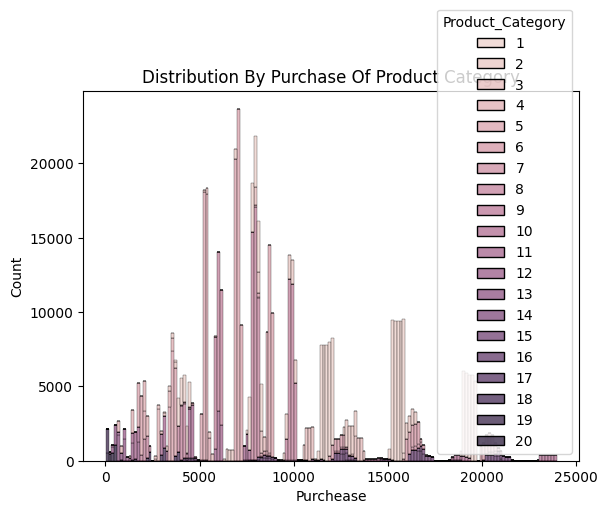

In [ ]:
sns.histplot(data=wal, x='Purchase', hue='Product_Category', multiple='stack')
plt.title('Distribution By Purchase Of Product Category')
plt.xlabel('Purchease')
plt.ylabel('Count')


**Missing value** ***&*** Outlier Detection

In [ ]:
missing_values = wal.isnull().sum()
print(missing_values)

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


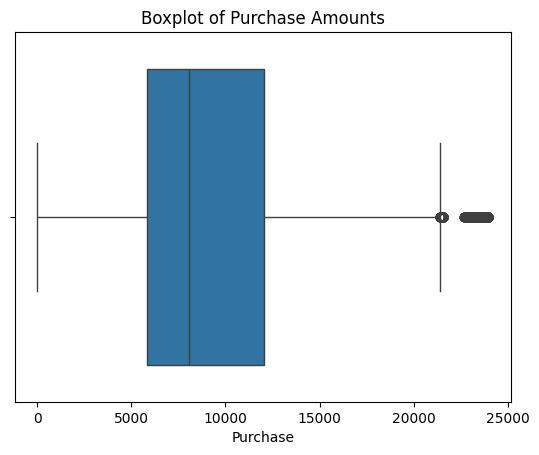

In [ ]:
sns.boxplot(x=wal['Purchase'])
plt.title('Boxplot of Purchase Amounts')
plt.show()

Non-Graphical Analysis: Value counts and unique attributes ​

In [ ]:
categorical_columns = ['Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status', 'Product_Category']
for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(wal[col].value_counts())
    print("\n")

Value counts for Gender:
Gender
M    414259
F    135809
Name: count, dtype: int64


Value counts for Age:
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64


Value counts for Occupation:
Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64


Value counts for City_Category:
City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64


Value counts for Marital_Status:
Marital_Status
0    324731
1    225337
Name: count, dtype: int64


Value counts for Product_Category:
Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947

**Visual Analysis - Univariate & Bivariate**

<ipython-input-44-2a657b3a3015>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wal['Purchase'], bins=50, color= 'green' ,kde=True)


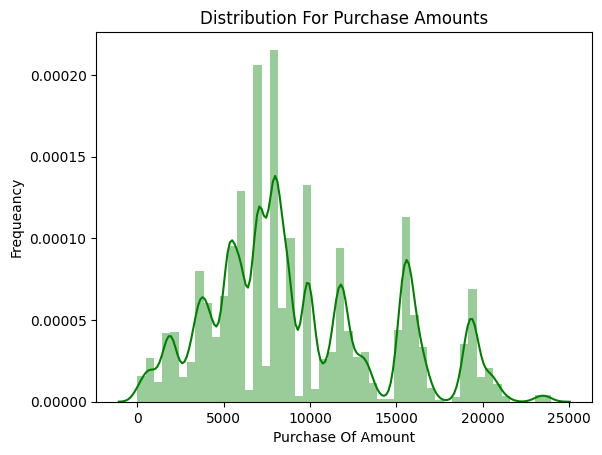

In [ ]:
#Distplot
sns.distplot(wal['Purchase'], bins=50, color= 'green' ,kde=True)
plt.title('Distribution For Purchase Amounts')
plt.xlabel('Purchase Of Amount')
plt.ylabel('Frequeancy')
plt.show()

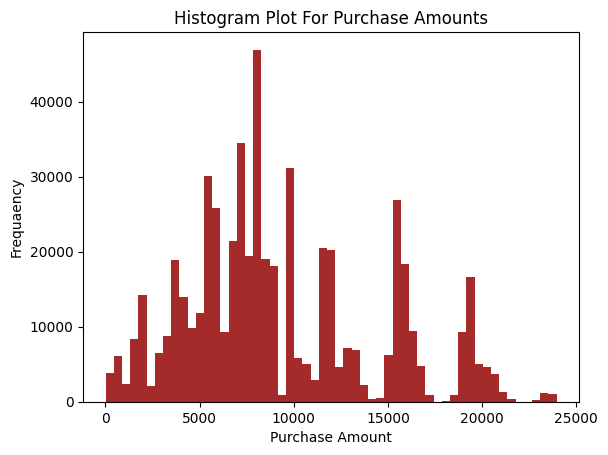

In [ ]:
#Histplot
plt.hist(wal['Purchase'], bins=55, color='brown')
plt.title('Histogram Plot For Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequaency')
plt.show()

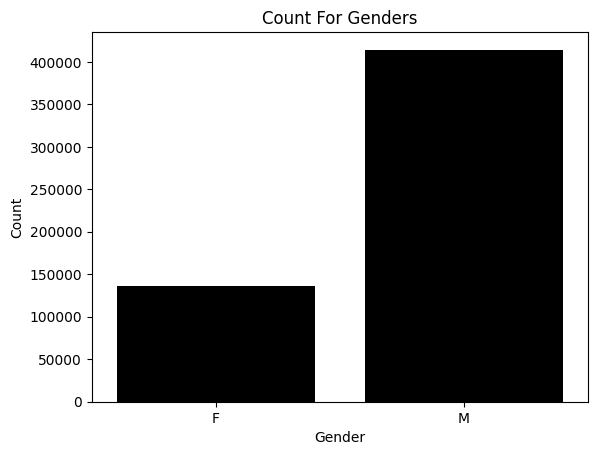

In [ ]:
#CountPlot
sns.countplot(x='Gender', color= 'black' , data=wal)
plt.title('Count For Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

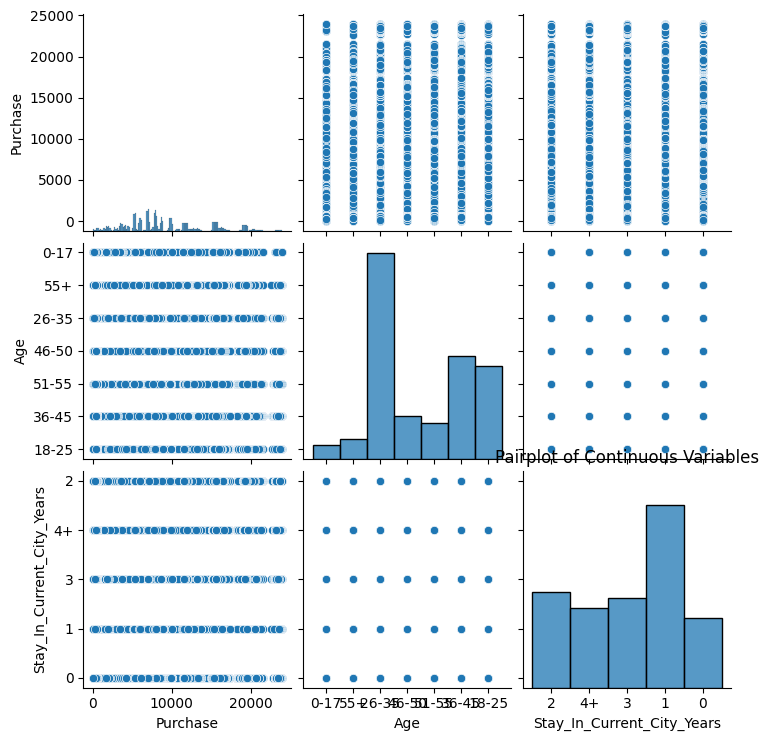

In [ ]:
#PairPlot
sns.pairplot(wal, vars=['Purchase', 'Age', 'Stay_In_Current_City_Years'])
plt.title('Pairplot of Continuous Variables')
plt.show()

Are women spending more money per transaction than men? Why or Why not?


In [ ]:
avg_purchase_gender = wal.groupby('Gender')['Purchase'].mean()
print("Purchase amount of gender:")
print(avg_purchase_gender)

Purchase amount of gender:
Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64
